In [0]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error

In [0]:
train_features = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_train.csv',
                              parse_dates=[3])

test_features = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_test.csv',
                             parse_dates=[3])
df = pd.concat([train_features, test_features], axis = 0)

In [0]:
df_sj = df[df['city'] == 'sj']
df_iq = df[df['city'] == 'iq']

Impute missing values using forward filling

In [0]:
df_sj = df_sj.fillna(method = 'ffill')
df_iq = df_iq.fillna(method = 'ffill')

In [209]:
df_sj.set_index('week_start_date', drop = True, inplace = True)
df_iq.set_index('week_start_date', drop = True, inplace = True)
df_sj

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
1990-06-04,sj,1990,23,0.196200,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
1990-06-11,sj,1990,24,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
1990-06-18,sj,1990,25,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
1990-06-25,sj,1990,26,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1


In [210]:
df_sj.drop(['city', 'year'], axis = 1, inplace = True)
df_iq.drop(['city', 'year'], axis = 1, inplace = True)
df_sj

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1990-05-07,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
1990-05-14,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
1990-05-21,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
1990-05-28,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
1990-06-04,23,0.196200,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
1990-06-11,24,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
1990-06-18,25,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
1990-06-25,26,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1


In [0]:
train_labels = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_labels_train.csv')
train_labels_sj = train_labels[train_labels['city'] == 'sj']['total_cases']
train_labels_iq = train_labels[train_labels['city'] == 'iq']['total_cases']

Create month variable

In [0]:
df_sj['month'] = df_sj.index.month
df_iq['month'] = df_iq.index.month

#SJ

Get monthly trend

In [213]:
x_train_months = pd.get_dummies(df_sj['month'], prefix='month')[:936]
x_test_months = pd.get_dummies(df_sj['month'], prefix='month')[936:]
y = train_labels_sj.values

# Split data hold out validation
xx_train_months = x_train_months[:717]
xx_valid_months = x_train_months[717:]
yy_train = y[:717]
yy_valid = y[717:]

# Check split lengths
print len(x_train_months), len(xx_train_months), len(xx_valid_months)
print len(y), len(yy_train), len(yy_valid)

936 717 219
936 717 219


In [0]:
# Get values for hold out validation
sj_month_lr_holdout = LinearRegression()
sj_month_lr_holdout.fit(xx_train_months, yy_train)
monthly_trend_holdout = pd.Series(sj_month_lr_holdout.predict(xx_train_months)).rolling(window=3, min_periods=1).mean()
sj_residuals_all_holdout = yy_train - monthly_trend_holdout

# Get values for entire training set
sj_month_lr = LinearRegression()
sj_month_lr.fit(x_train_months, y)
monthly_trend = pd.Series(sj_month_lr.predict(x_train_months)).rolling(window=3, min_periods=1).mean()
sj_residuals_all = y - monthly_trend

Correlation of features with total cases and residuals

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


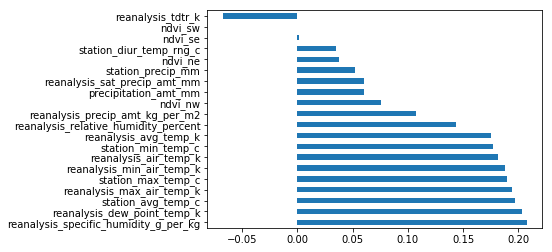

In [215]:
# compute the correlations
sj_features_with_lables = train_features[train_features['city'] == 'sj']
sj_features_with_lables['total_cases'] = train_labels_sj
sj_features_with_lables['residuals'] = sj_residuals_all
sj_correlations = sj_features_with_lables.corr()

#San Juan
(sj_correlations
     .total_cases
     .drop('total_cases')
     .drop('year')
     .drop('weekofyear') 
     .drop('residuals') 
     .sort_values(ascending=False)
     .plot
     .barh())

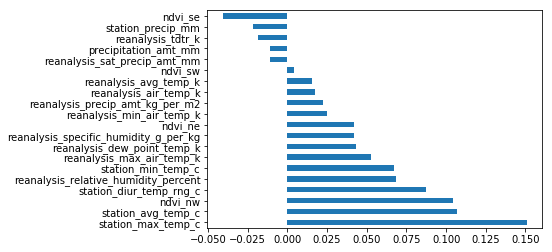

In [216]:
(sj_correlations
     .residuals
     .drop('total_cases')
     .drop('year')
     .drop('weekofyear') 
     .drop('residuals') 
     .sort_values(ascending=False)
     .plot
     .barh())

Rolling means df

In [0]:
x_train_means1 = df_sj['station_avg_temp_c'].rolling(window = 52).mean()[60:936]
x_train_means2 = df_sj['reanalysis_relative_humidity_percent'].rolling(window = 52).mean()[60:936]
x_train_means3 = df_sj['reanalysis_precip_amt_kg_per_m2'].rolling(window = 52).mean()[60:936]

Combine all dfs

In [0]:
x_train = pd.concat([x_train_means1,x_train_means2,x_train_means3], axis = 1)
y_train = sj_residuals_all[60:]

# For holdout validation
xx_train = pd.concat([x_train_means1[:657],x_train_means2[:657],x_train_means3[:657]], axis = 1)
yy_train = sj_residuals_all_holdout[60:]
xx_valid = pd.concat([x_train_means1[657:],x_train_means2[657:],x_train_means3[657:]], axis = 1)

In [0]:
x_test_means1 = df_sj['station_avg_temp_c'].rolling(window = 52).mean()[936:]
x_test_means2 = df_sj['reanalysis_relative_humidity_percent'].rolling(window = 52).mean()[936:]
x_test_means3 = df_sj['reanalysis_precip_amt_kg_per_m2'].rolling(window = 52).mean()[936:]

In [0]:
x_test = pd.concat([x_test_means1,x_test_means2,x_test_means3], axis = 1)

In [221]:
sj_residual_lr = LinearRegression()
sj_residual_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Make predictions on monthly data and residual data

In [0]:
sj_monthly_prediction = pd.Series(sj_month_lr.predict(x_test_months)).rolling(3, min_periods=1).mean()
sj_resid_prediction = sj_residual_lr.predict(x_test)
sj_cases_predictions = pd.Series(sj_resid_prediction + sj_monthly_prediction).rolling(1, min_periods=1).mean()
sj_cases_predictions = sj_cases_predictions.apply(lambda x: 1 if x < 1 else int(x))

Holdout validation

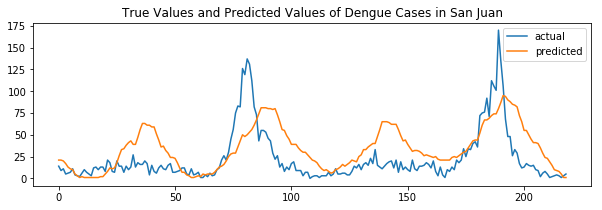

21.06392694063927


In [223]:
sj_residual_lr_holdout = LinearRegression()
sj_residual_lr_holdout.fit(xx_train, yy_train)

sj_monthly_prediction_holdout = pd.Series(sj_month_lr_holdout.predict(xx_valid_months)).rolling(3, min_periods=1).mean()
sj_resid_prediction_holdout = sj_residual_lr_holdout.predict(xx_valid)
sj_cases_predictions_holdout = pd.Series(sj_resid_prediction_holdout + sj_monthly_prediction_holdout).rolling(1, min_periods=1).mean()
sj_cases_predictions_holdout = sj_cases_predictions_holdout.apply(lambda x: 1 if x < 1 else int(x))

# Plot
plt.figure(figsize=(10, 3))
plt.title('True Values and Predicted Values of Dengue Cases in San Juan')
plt.plot(yy_valid, label = 'actual')
plt.plot(sj_cases_predictions_holdout, label = 'predicted')
plt.legend()
plt.show()

print mean_absolute_error(sj_cases_predictions_holdout, yy_valid)

Plot Monthly trend, Residuals, and True values.

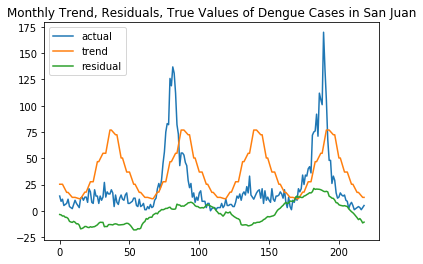

In [224]:
# Plot
plt.title('Monthly Trend, Residuals, True Values of Dengue Cases in San Juan')
plt.plot(yy_valid, label = 'actual')
plt.plot(sj_monthly_prediction_holdout, label = 'trend')
plt.plot(sj_resid_prediction_holdout, label = 'residual')
plt.legend()
plt.show()

# IQ

In [225]:
x_train_months = pd.get_dummies(df_iq['month'], prefix='month')[:520]
x_test_months = pd.get_dummies(df_iq['month'], prefix='month')[520:]
y = train_labels_iq.values

# Split data hold out validation
xx_train_months = x_train_months[:398]
xx_valid_months = x_train_months[398:]
yy_train = y[:398]
yy_valid = y[398:]

# Check split lengths
print len(x_train_months), len(xx_train_months), len(xx_valid_months)
print len(y), len(yy_train), len(yy_valid)

520 398 122
520 398 122


In [226]:
# Get values for hold out validation
iq_month_lr_holdout = LinearRegression()
iq_month_lr_holdout.fit(xx_train_months, yy_train)
monthly_trend_holdout = pd.Series(iq_month_lr_holdout.predict(xx_train_months)).rolling(window=3, min_periods=1).mean()
iq_residuals_all_holdout = yy_train - monthly_trend_holdout

# Get values for entire training set
iq_month_lr = LinearRegression()
iq_month_lr.fit(x_train_months, y)
monthly_trend = pd.Series(iq_month_lr.predict(x_train_months)).rolling(3, min_periods=1).mean()
iq_residuals_all = y - monthly_trend
print(iq_residuals_all.size)

520


Correlation of features with total cases and residuals

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


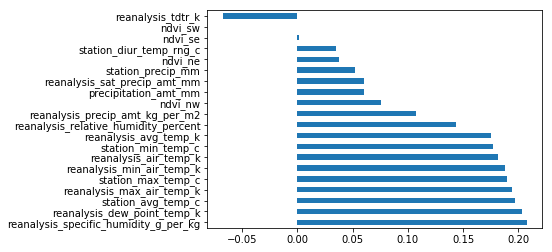

In [227]:
# compute the correlations
iq_features_with_lables = train_features[train_features['city'] == 'iq']
iq_features_with_lables['total_cases'] = train_labels_iq
iq_features_with_lables['residuals'] = iq_residuals_all
iq_correlations = iq_features_with_lables.corr()

# With total cases
(sj_correlations
     .total_cases
     .drop('total_cases')
     .drop('year')
     .drop('weekofyear') 
     .drop('residuals') 
     .sort_values(ascending=False)
     .plot
     .barh())

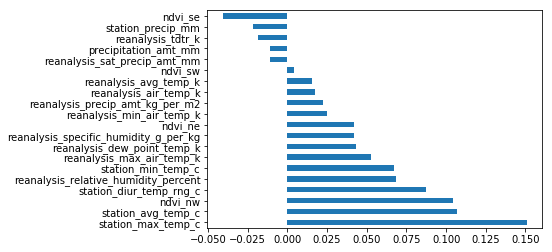

In [228]:
# With residuals
(sj_correlations
     .residuals
     .drop('total_cases')
     .drop('year')
     .drop('weekofyear') 
     .drop('residuals') 
     .sort_values(ascending=False)
     .plot
     .barh())

In [0]:
x_train_means1 = df_iq['station_avg_temp_c'].rolling(window = 52).mean()[60:520]
x_train_means2= df_iq['reanalysis_relative_humidity_percent'].rolling(window = 52).mean()[60:520]
x_train_means3= df_iq['reanalysis_specific_humidity_g_per_kg'].rolling(window = 52).mean()[60:520]
x_train_means4= df_iq['reanalysis_dew_point_temp_k'].rolling(window = 52).mean()[60:520]
x_train_means5 =df_iq['reanalysis_min_air_temp_k'].rolling(window = 52).mean()[60:520]

In [0]:
x_train = pd.concat([x_train_means1,x_train_means2,x_train_means3,x_train_means4,x_train_means5], axis = 1)
y_train = iq_residuals_all[60:]

# For holdout validation
xx_train = pd.concat([x_train_means1[:338],x_train_means2[:338],x_train_means3[:338]], axis = 1)
yy_train = iq_residuals_all_holdout[60:]
xx_valid = pd.concat([x_train_means1[338:],x_train_means2[338:],x_train_means3[338:]], axis = 1)

In [0]:
x_test_means1 = df_iq['station_avg_temp_c'].rolling(window = 52).mean()[520:]
x_test_means2 = df_iq['reanalysis_relative_humidity_percent'].rolling(window = 52).mean()[520:]
x_test_means3 = df_iq['reanalysis_specific_humidity_g_per_kg'].rolling(window = 52).mean()[520:]
x_test_means4 = df_iq['reanalysis_dew_point_temp_k'].rolling(window = 52).mean()[520:]
x_test_means5 = df_iq['reanalysis_min_air_temp_k'].rolling(window = 52).mean()[520:]

In [0]:
x_test = pd.concat([x_test_means1,x_test_means2,x_test_means3,x_test_means4,x_test_means5], axis = 1)

In [233]:
iq_residual_lr = LinearRegression()
iq_residual_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [234]:
iq_monthly_prediction = pd.Series(iq_month_lr.predict(x_test_months)).rolling(8, min_periods=1).mean()
print(iq_monthly_prediction.size)
iq_resid_prediction = iq_residual_lr.predict(x_test)
print(iq_resid_prediction.size)
iq_cases_predictions = pd.Series(iq_resid_prediction + iq_monthly_prediction)
iq_cases_predictions = iq_cases_predictions.apply(lambda x: 0 if x < 1 else int(x))

156
156


Holdout validatiom

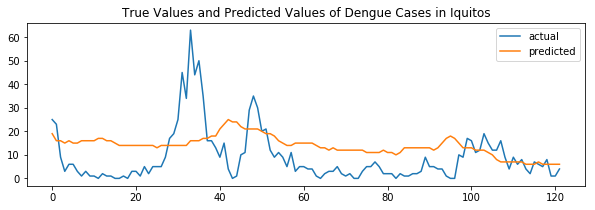

9.704918032786885


In [235]:
iq_residual_lr_holdout = LinearRegression()
iq_residual_lr_holdout.fit(xx_train, yy_train)

iq_monthly_prediction_holdout = pd.Series(iq_month_lr_holdout.predict(xx_valid_months)).rolling(3, min_periods=1).mean()
iq_resid_prediction_holdout = iq_residual_lr_holdout.predict(xx_valid)
iq_cases_predictions_holdout = pd.Series(iq_resid_prediction_holdout + iq_monthly_prediction_holdout).rolling(1, min_periods=1).mean()
iq_cases_predictions_holdout = iq_cases_predictions_holdout.apply(lambda x: 0 if x < 1 else int(x))

# Plot
plt.figure(figsize=(10, 3))
plt.title('True Values and Predicted Values of Dengue Cases in Iquitos')
plt.plot(yy_valid, label = 'actual')
plt.plot(iq_cases_predictions_holdout, label = 'predicted')
plt.legend()
plt.show()

print mean_absolute_error(iq_cases_predictions_holdout, yy_valid)

Plot Monthly trend, Residuals, and True values

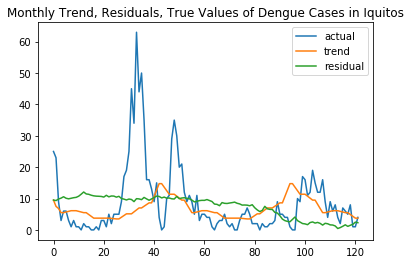

In [236]:
# Plot
plt.title('Monthly Trend, Residuals, True Values of Dengue Cases in Iquitos')
plt.plot(yy_valid, label = 'actual')
plt.plot(iq_monthly_prediction_holdout, label = 'trend')
plt.plot(iq_resid_prediction_holdout, label = 'residual')
plt.legend()
plt.show()

In [0]:
total_predictions = list(sj_cases_predictions) + list(iq_cases_predictions)

In [238]:
submission = pd.read_csv("https://s3.amazonaws.com/drivendata/data/44/public/submission_format.csv",index_col=[0, 1, 2])

submission['total_cases'] = total_predictions 
submission['total_cases'] = submission['total_cases'].apply(lambda x: int(x))
# submission_format.to_csv("./datasets/submission.csv",index=False)
print(submission)
submission.to_csv("attempt1.csv")
from google.colab import files

#files.download('attempt1.csv')

                      total_cases
city year weekofyear             
sj   2008 18                    1
          19                    1
          20                    1
          21                    1
          22                    1
          23                    1
          24                    1
          25                    1
          26                    1
          27                    1
          28                    1
          29                    2
          30                    2
          31                    3
          32                    9
          33                   17
          34                   25
          35                   26
          36                   29
          37                   31
          38                   35
          39                   31
          40                   32
          41                   37
          42                   40
          43                   45
          44                   50
          45  